# Compute reward per participant

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

pd.set_option('display.max_columns', None)

df = pd.read_csv('data_inclBDI_n17.csv')

In [3]:
subjects = df['Participant Private ID'].unique()

rew_sbj = dict()
for sbj in subjects: 
    df_sbj = df[df['Participant Private ID'] == sbj]
    rew = df_sbj['reward'].sum()
    rew_sbj[sbj] = rew

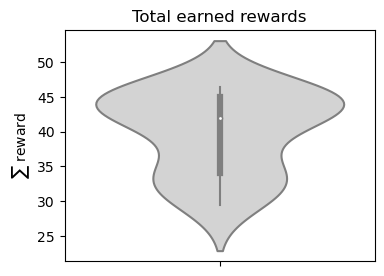

In [4]:
df_rew = pd.DataFrame(list(rew_sbj.items()), columns=['sbj_id', 'value'])

plt.figure(figsize=(4,3))
sns.violinplot(df_rew, y='value', color='lightgrey')
plt.title('Total earned rewards')
_=plt.ylabel(r'$\sum$ reward')

In [13]:
print(df_rew['value'].mean(), df_rew['value'].std())
print(df_rew['value'].min(), df_rew['value'].max())

39.970588235294116 5.848265202806123
29.5 46.5


In [5]:
# compute number of wins and net wins (wins - losses)
num_wins = dict()
net_wins = dict()

for sbj in subjects: 
    df_sbj = df[df['Participant Private ID'] == sbj]
    
    try: 
        num_wins_sbj = df_sbj['reward'].value_counts()[1.5]
    except KeyError: 
        num_wins_sbj = 0
    
    num_wins[sbj] = num_wins_sbj
    
    try: 
        num_losses_sbj = df_sbj['reward'].value_counts()[0.0]
    except KeyError: 
        num_losses_sbj = 0
        
    net_wins_sbj = num_wins_sbj - num_losses_sbj
    
    net_wins[sbj] = net_wins_sbj    


In [6]:
df_wins = pd.DataFrame(list(num_wins.items()), columns=['sbj_id', 'wins'])
df_net = pd.DataFrame(list(net_wins.items()), columns=['sbj_id', 'wins'])

In [14]:
print('number of wins: ',df_wins['wins'].mean(), df_wins['wins'].std())
print(df_wins['wins'].min(), df_wins['wins'].max())
print('net wins', df_net['wins'].mean(), df_net['wins'].std())
print(df_net['wins'].min(), df_net['wins'].max())

number of wins:  20.58823529411765 8.91668957299605
0 30
net wins -0.6470588235294118 3.8881418516848805
-9 6


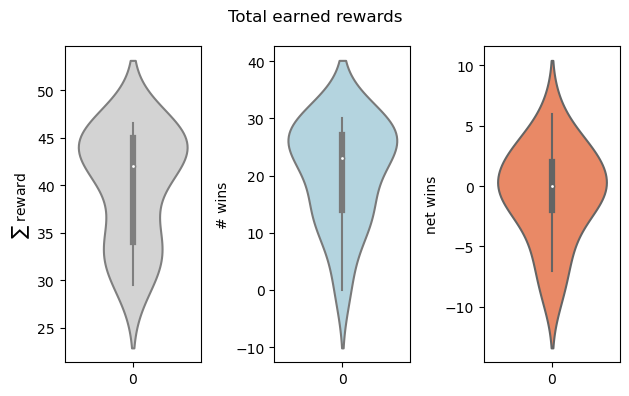

In [7]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Total earned rewards')
fig.set_figheight(4)

sns.violinplot(df_rew['value'], color='lightgrey', ax=axs[0])
axs[0].set_ylabel(r'$\sum$ reward')

sns.violinplot(df_wins['wins'], color='lightblue', ax=axs[1])
axs[1].set_ylabel('# wins')

sns.violinplot(df_net['wins'], color='coral', ax=axs[2])
axs[2].set_ylabel('net wins')

plt.tight_layout()

plt.savefig('reward_stats_data.svg')